# Insurance Cost Prediction
In order to make their profit, insurance companies must collect a higher premium than the amount which may become due to the insured person. To achieve this, insurance companies invest a lot of time, effort, and money in creating models that accurately predict healthcare expenses.

Note: The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.

Domain: Finance

### Columns Description:
**age:** age of primary beneficiary

**sex:** beneficiary’s gender - female or male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking or non-smoking

**region:** the beneficiary's residential area in the US; northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance (to be predicted)

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [2]:
insurance_df = pd.read_csv("data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
print(insurance_df.shape)

insurance_df.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance_df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
insurance_df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Exploratory Data Analysis

> ### Univariate Analysis - Categorical Data

In [11]:
categorical_df = insurance_df.select_dtypes(include=['object'])

categorical_df.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [12]:
def categorical_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [13]:
categorical_univariate_analysis(categorical_df)

********** sex **********
count                1338
nunique                 2
unique     [female, male]
Name: sex, dtype: object
Value Counts: 
 sex
male      676
female    662
Name: count, dtype: int64

********** smoker **********
count           1338
nunique            2
unique     [yes, no]
Name: smoker, dtype: object
Value Counts: 
 smoker
no     1064
yes     274
Name: count, dtype: int64

********** region **********
count                                              1338
nunique                                               4
unique     [southwest, southeast, northwest, northeast]
Name: region, dtype: object
Value Counts: 
 region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



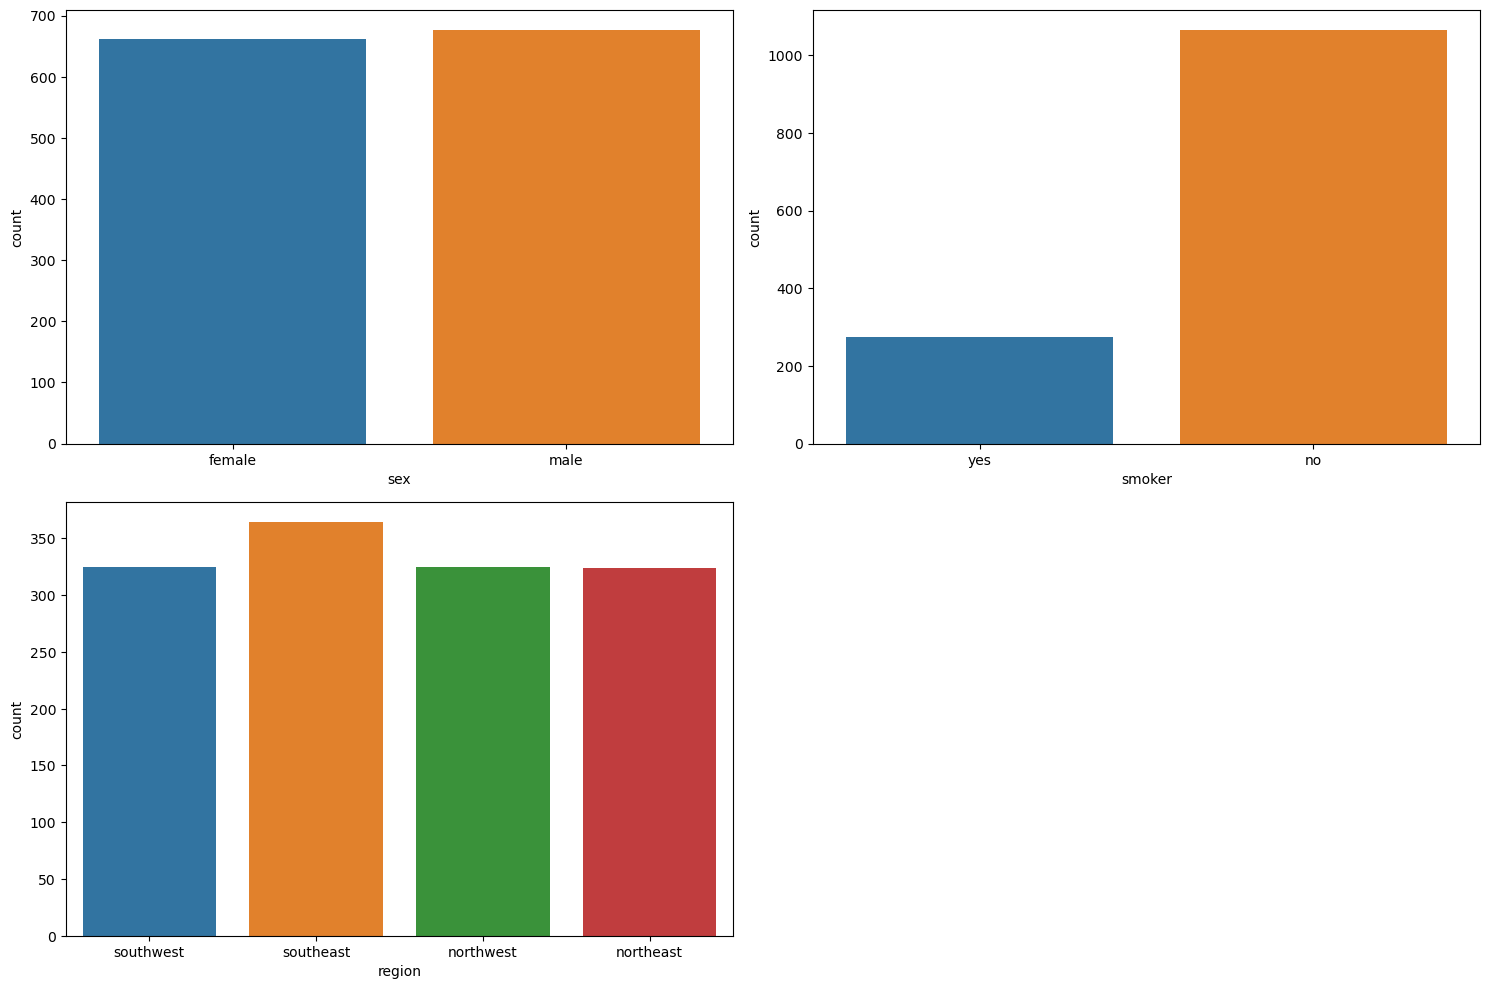

In [14]:
# Set up the subplot grid
num_plots = len(categorical_df.columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols
plt.figure(figsize=(15, 5*num_rows))

# Loop through each categorical column and create a countplot
for i, col in enumerate(categorical_df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=categorical_df, x=col)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

> ### Univariate Analysis - Numerical Data

In [15]:
numerical_df = insurance_df.select_dtypes(include=['int64', 'float64'])

numerical_df.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [16]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [17]:
numerical_univariate_analysis(numerical_df)

********** age **********
min       18.000000
max       64.000000
mean      39.207025
median    39.000000
std       14.049960
Name: age, dtype: float64

********** bmi **********
min       15.960000
max       53.130000
mean      30.663397
median    30.400000
std        6.098187
Name: bmi, dtype: float64

********** children **********
min       0.000000
max       5.000000
mean      1.094918
median    1.000000
std       1.205493
Name: children, dtype: float64

********** charges **********
min        1121.873900
max       63770.428010
mean      13270.422265
median     9382.033000
std       12110.011237
Name: charges, dtype: float64



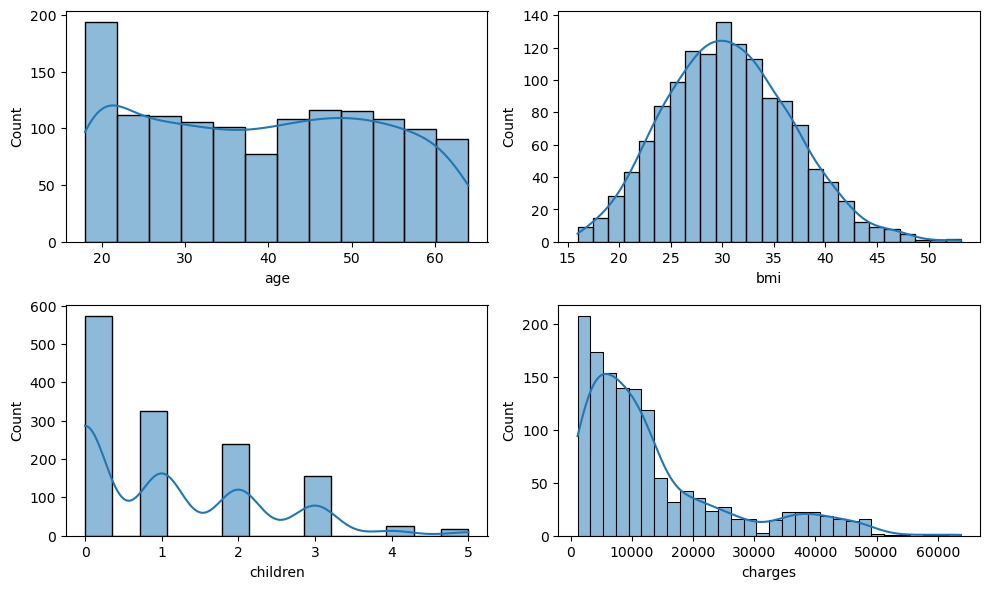

In [18]:
num_columns = numerical_df.columns
num_plots = len(num_columns)
num_rows = (num_plots + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(10, 6))

for i, column in enumerate(num_columns):
    row, col = divmod(i, 2)
    sns.histplot(numerical_df[column], kde=True, ax=axes[row, col])
    axes[row, col]

plt.tight_layout()
plt.show()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

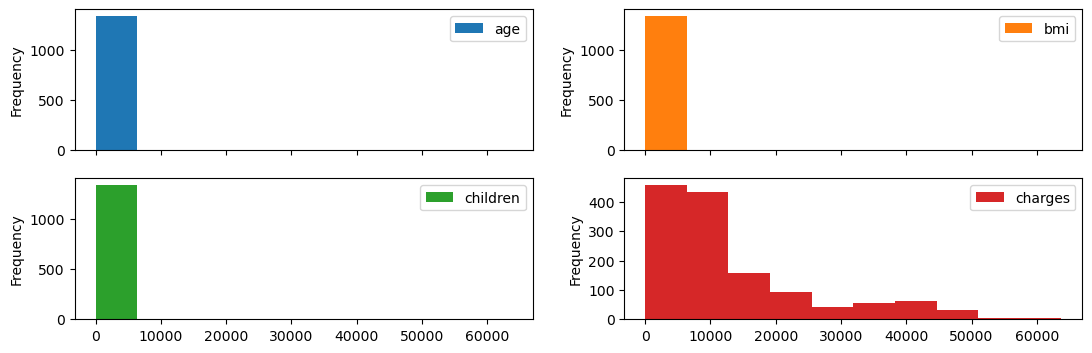

In [19]:
numerical_df.plot(kind='hist', subplots=True, layout=(7, 2), figsize=(13, 15))

age            Axes(0.125,0.786098;0.352273x0.0939024)
bmi         Axes(0.547727,0.786098;0.352273x0.0939024)
children       Axes(0.125,0.673415;0.352273x0.0939024)
charges     Axes(0.547727,0.673415;0.352273x0.0939024)
dtype: object

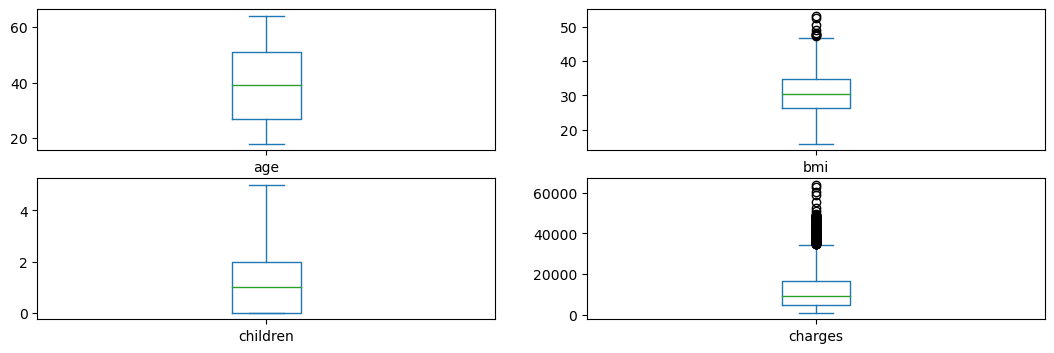

In [20]:
numerical_df.plot(kind='box', subplots=True, layout=(7, 2), figsize=(13, 15))

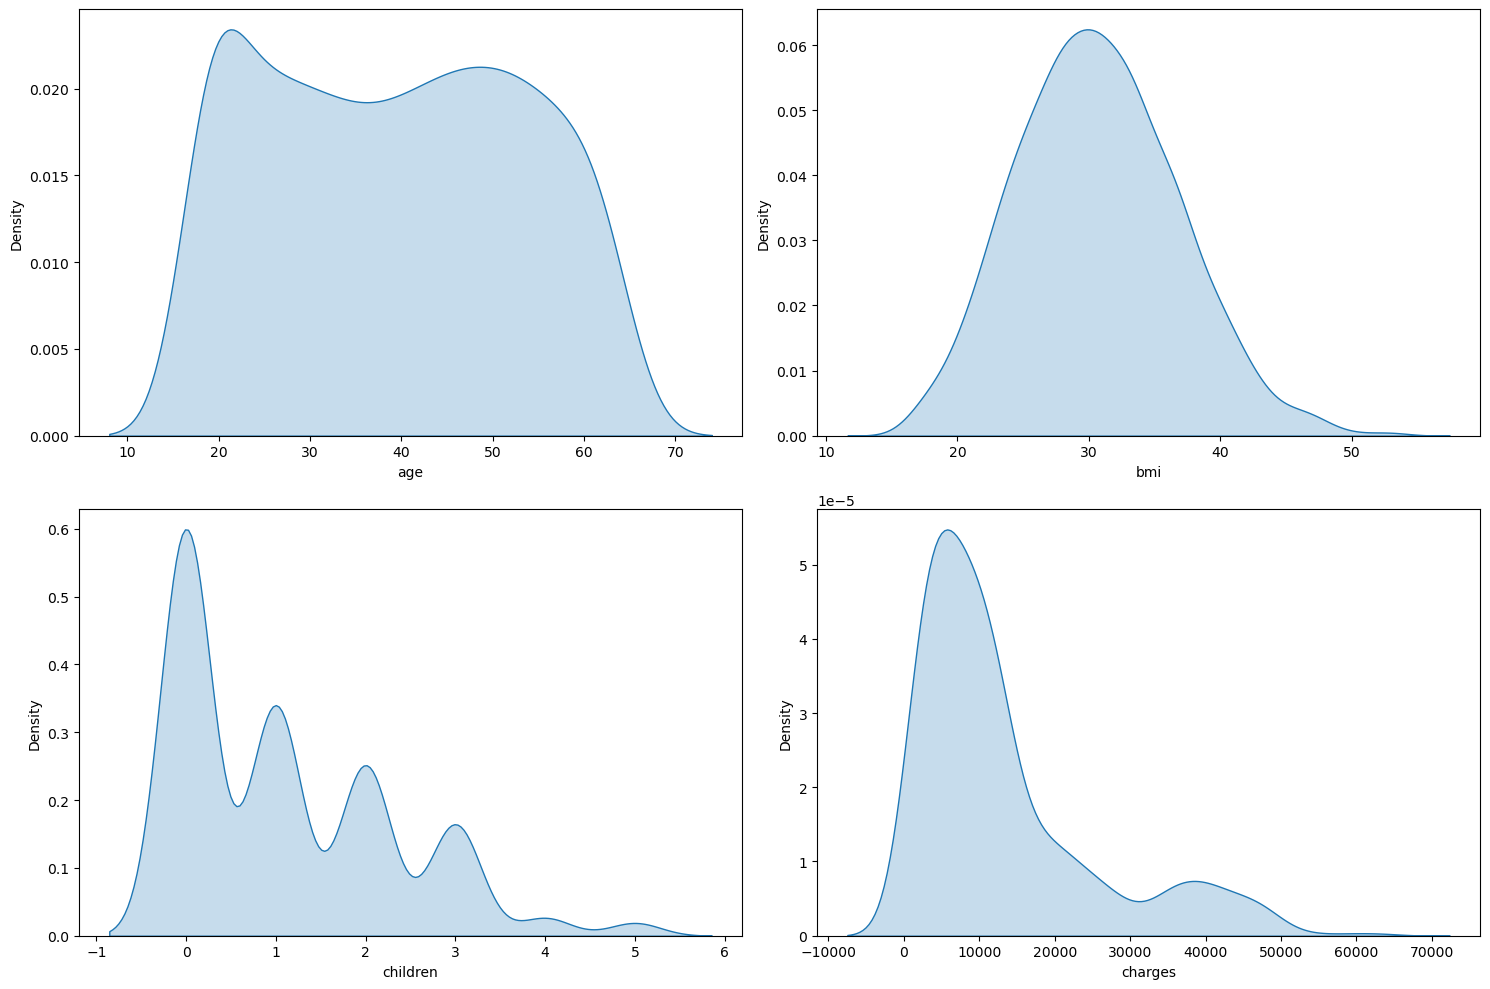

In [21]:
# Set up the subplot grid
num_plots = len(numerical_df.columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols
plt.figure(figsize=(15, 5*num_rows))

# Loop through each categorical column and create a countplot
for i, col in enumerate(numerical_df.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=numerical_df, x=col, shade=True)

plt.tight_layout()
plt.show()

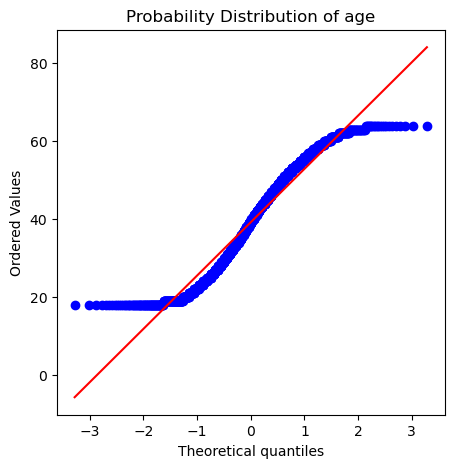

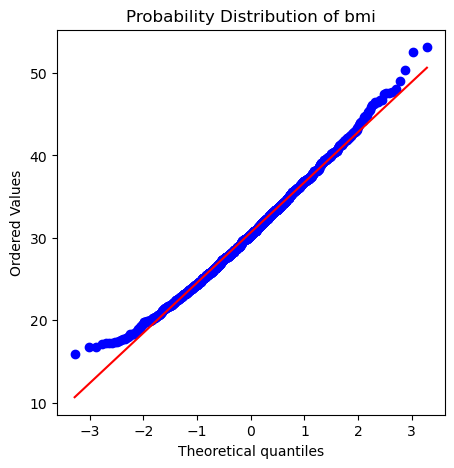

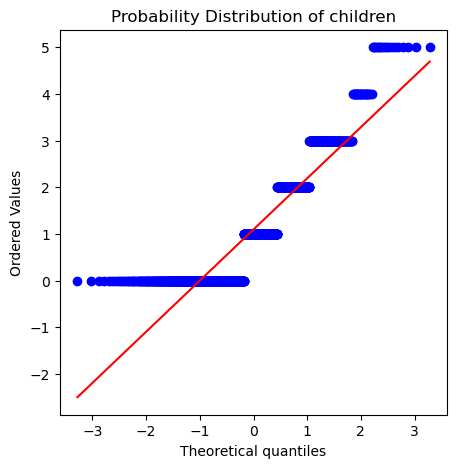

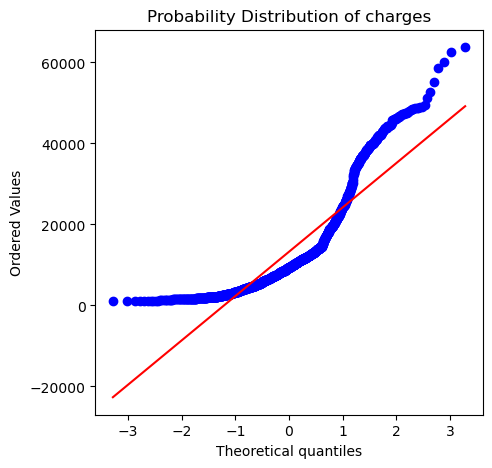

In [22]:
from scipy import stats

numerical_columns = numerical_df.select_dtypes(include=['int', 'float']).columns

for column in numerical_columns:
    # Calculate the probability distribution
    probability_distribution = numerical_df[column].value_counts(normalize=True)
    
    # Plot the probability distribution using probplot
    plt.figure(figsize=(5, 5))
    stats.probplot(numerical_df[column], dist="norm", plot=plt)
    plt.title(f'Probability Distribution of {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.show()

> ### Bivariate Analysis - Numerical vs Numerical Data

In [23]:
numerical_df.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

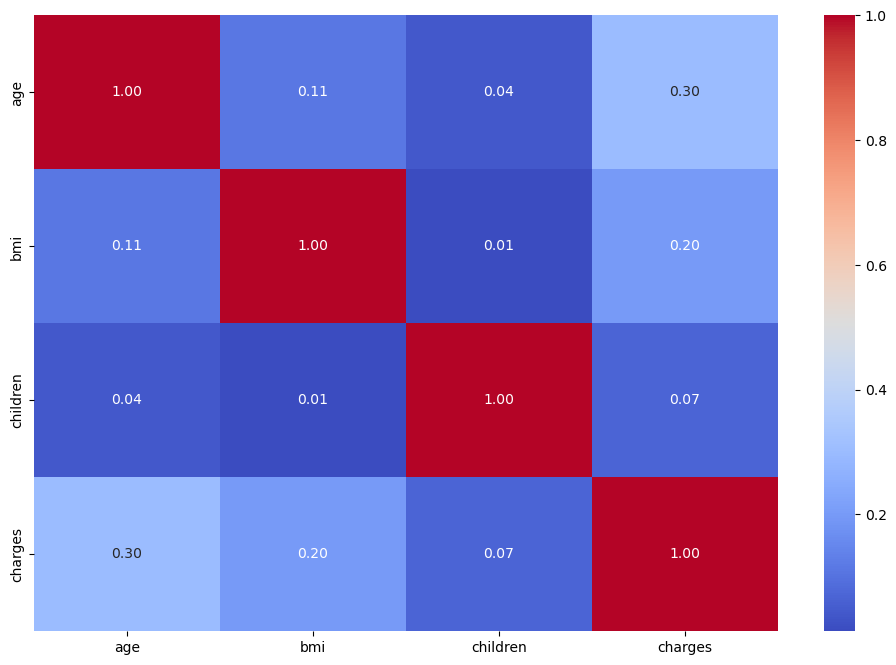

In [24]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

<Axes: xlabel='age', ylabel='charges'>

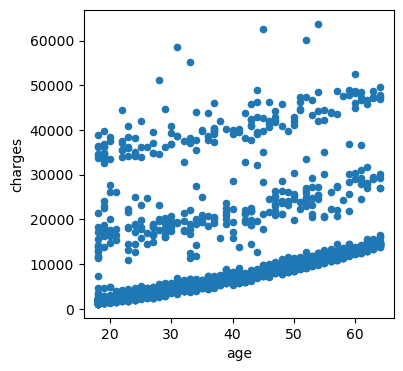

In [25]:
numerical_df.plot(kind='scatter', x='age', y='charges', figsize=(4, 4))

<Axes: xlabel='children', ylabel='charges'>

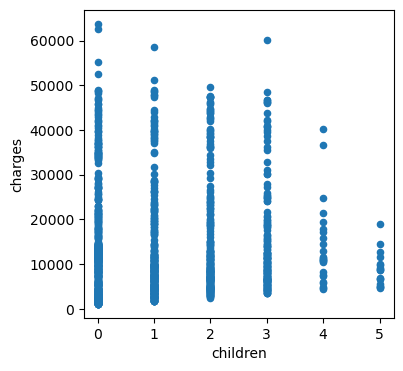

In [26]:
numerical_df.plot(kind='scatter', x='children', y='charges', figsize=(4, 4))

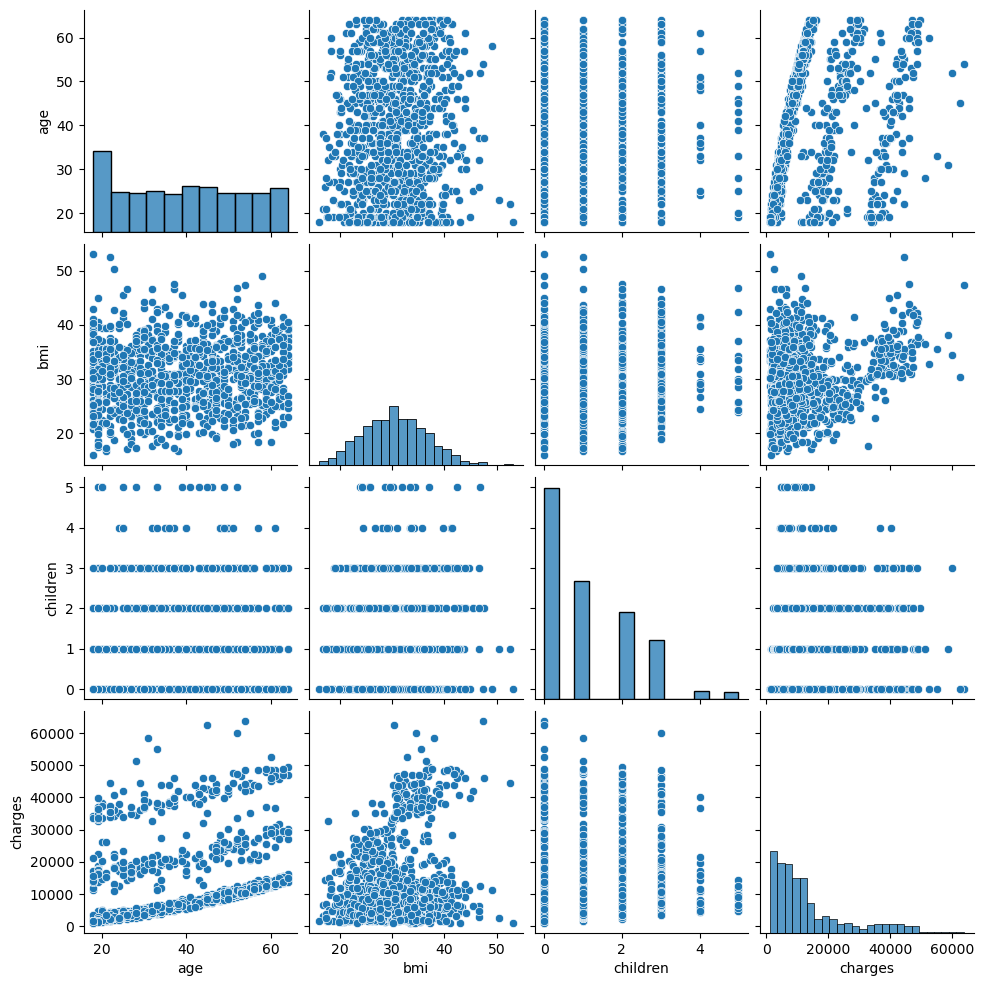

In [27]:
sns.pairplot(numerical_df.sample(n=1000))
plt.show()

> ### Bivariate Analysis - Categorical vs Categorical Data

In [28]:
categorical_df.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [29]:
pd.crosstab(categorical_df['sex'], categorical_df['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


<Axes: xlabel='sex'>

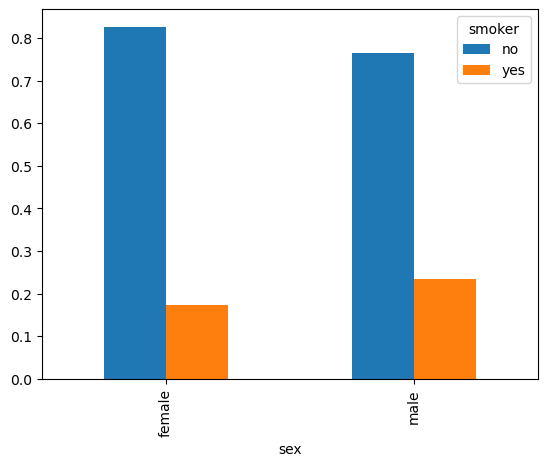

In [30]:
tab = pd.crosstab(categorical_df['sex'], categorical_df['smoker'], normalize='index')

tab.plot(kind='bar')

<Axes: ylabel='sex'>

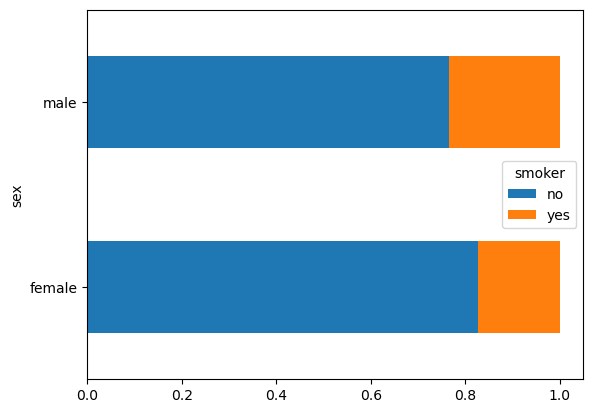

In [31]:
tab.plot(kind='barh', stacked=True)

In [32]:
pd.crosstab(categorical_df['sex'], categorical_df['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


<Axes: xlabel='sex'>

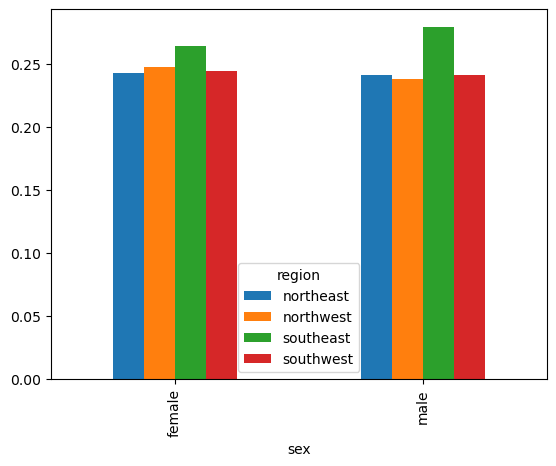

In [33]:
tab = pd.crosstab(categorical_df['sex'], categorical_df['region'], normalize='index')

tab.plot(kind='bar')

<Axes: ylabel='sex'>

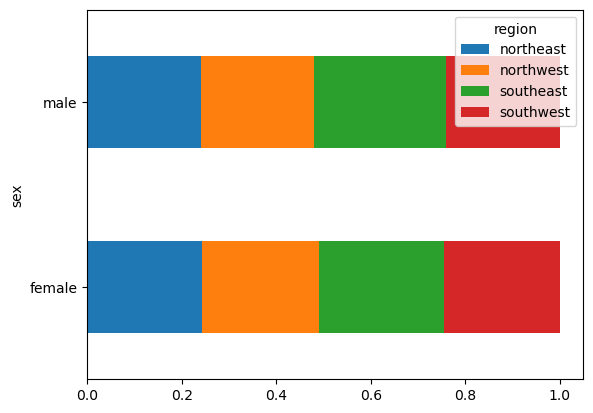

In [34]:
tab.plot(kind='barh', stacked=True)

> ### Bivariate Analysis - Numerical vs Categorical Data

In [35]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [36]:
group = insurance_df.groupby('region')

group['bmi'].agg(['min', 'max', 'mean', 'median'])

,min,max,mean,median
region,,,,
northeast,15.960,48.07,29.173503,28.88
northwest,17.385,42.94,29.199785,28.88
southeast,19.800,53.13,33.355989,33.33
southwest,17.400,47.60,30.596615,30.30


<Axes: title={'center': 'bmi'}, xlabel='region'>

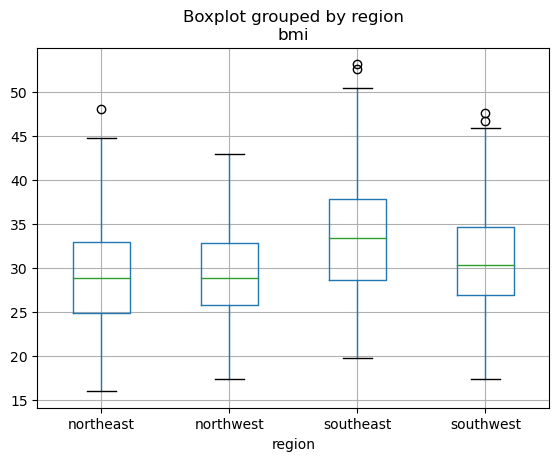

In [37]:
insurance_df.boxplot(by='region', column='bmi')

# Data Preprocessing

In [38]:
from sklearn.preprocessing import OneHotEncoder

# Converting categorical variables to numerical using one-hot encoding
categorical_cols = ['sex', 'smoker', 'region']

# One-hot encode categorical variables
insurance_df = pd.get_dummies(insurance_df, columns=categorical_cols)

In [39]:
print(insurance_df.shape)

insurance_df.head()

(1338, 12)


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


# Model Building

## Identifying Inputs and Output

In [40]:
X = insurance_df.drop(['charges'], axis=1)

y = insurance_df['charges']

## Split data into train and test sets

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(1070, 11) (1070,)
(268, 11) (268,)


## Data preprocessing on X_train and X_test

In [42]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Train and Evaluate the model

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

##### Linear Regression

In [44]:
lr_model = LinearRegression()

lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

# Evaluate
lr_model_r2 = r2_score(y_test,y_pred)
print('r2_score: ',lr_model_r2)

lr_model_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',lr_model_mae)

lr_model_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',lr_model_mse)

r2_score:  0.7835738996725156
MAE:  4181.564618971744
MSE:  33599877.53755326


##### Decision Tree Regression

In [45]:
dt_model = DecisionTreeRegressor()

dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_model.predict(X_test_scaled)

# Evaluate
dt_model_r2 = r2_score(y_test,y_pred)
print('r2_score: ',dt_model_r2)

dt_model_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',dt_model_mae)

dt_model_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',dt_model_mse)

r2_score:  0.7260070858848494
MAE:  3103.832538914179
MSE:  42537052.35411157


##### Ridge Regression

In [46]:
ridge_model = Ridge()

ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate
ridge_model_r2 = r2_score(y_test,y_pred)
print('r2_score: ',ridge_model_r2)

ridge_model_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',ridge_model_mae)

ridge_model_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',ridge_model_mse)

r2_score:  0.7835661821408256
MAE:  4181.772383375147
MSE:  33601075.67455838


##### Lasso Regression

In [47]:
lasso_model = Lasso()

lasso_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test_scaled)

# Evaluate
lasso_model_r2 = r2_score(y_test,y_pred)
print('r2_score: ',lasso_model_r2)

lasso_model_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',lasso_model_mae)

lasso_model_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',lasso_model_mse)

r2_score:  0.7835697236080412
MAE:  4181.426367478591
MSE:  33600525.86626553


##### Random Forest

In [48]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate
rf_model_r2 = r2_score(y_test,y_pred)
print('r2_score: ',rf_model_r2)

rf_model_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',rf_model_mae)

rf_model_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',rf_model_mse)

r2_score:  0.862884543515446
MAE:  2523.024590550311
MSE:  21287000.687142484


##### Bagging

In [49]:
bag_model = BaggingRegressor()

bag_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = bag_model.predict(X_test_scaled)

# Evaluate
bag_model_r2 = r2_score(y_test,y_pred)
print('r2_score: ',bag_model_r2)

bag_model_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',bag_model_mae)

bag_model_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',bag_model_mse)

r2_score:  0.8528579422671575
MAE:  2471.5772545932837
MSE:  22843617.81211309


##### Gradient Boosting

In [50]:
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test_scaled)

# Evaluate
gb_model_r2 = r2_score(y_test,y_pred)
print('r2_score: ',gb_model_r2)

gb_model_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',gb_model_mae)

gb_model_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',gb_model_mse)

r2_score:  0.8790064773563582
MAE:  2410.1002066389347
MSE:  18784090.909146566


##### XGBoost

In [51]:
xgb_model = XGBRegressor()

xgb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate
xgb_model_r2 = r2_score(y_test,y_pred)
print('r2_score: ',xgb_model_r2)

xgb_model_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',xgb_model_mae)

xgb_model_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',xgb_model_mse)

r2_score:  0.8419880833582454
MAE:  2803.2764272679606
MSE:  24531149.61921626


##### ADA Boost

In [52]:
ada_model = AdaBoostRegressor()

ada_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = ada_model.predict(X_test_scaled)

# Evaluate
ada_model_r2 = r2_score(y_test,y_pred)
print('r2_score: ',ada_model_r2)

ada_model_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',ada_model_mae)

ada_model_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',ada_model_mse)

r2_score:  0.7905644324105543
MAE:  4914.796986458078
MSE:  32514606.19752104


##### ANN

In [53]:
MLPR = MLPRegressor()

MLPR.fit(X_train_scaled,y_train)

# Predict on the test set
y_pred = MLPR.predict(X_test_scaled)

# Evaluate
MLPR_r2 = r2_score(y_test,y_pred)
print('r2_score: ',MLPR_r2)

MLPR_mae = mean_absolute_error(y_test,y_pred)
print('MAE: ',MLPR_mae)

MLPR_mse = mean_squared_error(y_test,y_pred)
print('MSE: ',MLPR_mse)

r2_score:  -0.9300946477923635
MAE:  12446.948699307704
MSE:  299644745.72882575


##### Linear Regression

r2_score:  0.7835738996725156

MAE:  4181.564618971744

MSE:  33599877.53755326

##### Decision Tree Regression

r2_score:  0.7136131069827567

MAE:  3061.8220815261193

MSE:  44461201.85679728

##### Ridge Regression

r2_score:  0.7835661821408256

MAE:  4181.772383375147

MSE:  33601075.67455838

##### Lasso Regression

r2_score:  0.7835697236080412

MAE:  4181.426367478591

MSE:  33600525.86626553

##### Random Forest Regression

r2_score:  0.8610656468492448

MAE:  2548.1671086192946

MSE:  21569382.087284822

##### Bagging

r2_score:  0.8420476954852987

MAE:  2583.059283623135

MSE:  24521894.9121097

##### Gradient Boosting

r2_score:  0.8793530602367609

MAE:  2405.9430977501315

MSE:  18730284.35660729

##### XGBoost Regression

r2_score:  0.8419880833582454

MAE:  2803.2764272679606

MSE:  24531149.61921626

##### Ada Boost

r2_score:  0.839498031260459

MAE:  3987.4020062475124

MSE:  24917727.04874602

##### ANN

r2_score:  -0.9340877752848589

MAE:  12441.758113599926

MSE:  300264673.7067206

# Hyperparameter Tuning

In [54]:
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
import joblib
from joblib import Memory

import os
import warnings

warnings.filterwarnings('ignore')

In [56]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'random_forest': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', RandomForestRegressor())
    ], memory=memory),
    'gradient_boost': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', GradientBoostingRegressor())
    ], memory=memory),
    'bagging': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', BaggingRegressor())
    ], memory=memory),
    'xg_boost': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', XGBRegressor())
    ], memory=memory),
    'ada_boost': Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', AdaBoostRegressor())
    ], memory=memory)
}

In [57]:
# Define parameter grid for each algorithm
param_grids = {
    'random_forest': [
        {
            'regressor__n_estimators': [50, 100, 200, 500],
            'regressor__max_depth': [None, 10, 20, 30],
            'regressor__min_samples_split': [2, 5, 10]
        }
    ],
    'gradient_boost': [
        {
            'regressor__n_estimators': [50, 100, 200, 500],
            'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]
        }
    ],
    'bagging': [
        {
            'regressor__base_estimator': [DecisionTreeRegressor(max_depth=5), DecisionTreeRegressor(max_depth=10)],
            'regressor__n_estimators': [10, 50, 100, 200]
        }
    ],
    'xg_boost': [
        {
            'regressor__n_estimators': [50, 100, 200, 500],
            'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]
        }
    ],
    'ada_boost': [
        {
            'regressor__base_estimator': [DecisionTreeRegressor(max_depth=1), DecisionTreeRegressor(max_depth=2)],
            'regressor__n_estimators': [50, 100, 200, 500],
            'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]
        }
    ]
}

In [58]:
# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*15, algo, "*"*15)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='r2',
                               return_train_score=True,
                               verbose=1
                              )

    # Ensure to have a split dataset
    %time grid_search.fit(X_train_scaled, y_train)

    best_models[algo] = grid_search.best_estimator_
    
    print('Test Score: ', grid_search.score(X_test_scaled, y_test))
    print()

*************** random_forest ***************
Fitting 5 folds for each of 48 candidates, totalling 240 fits
CPU times: total: 4min 57s
Wall time: 6min 9s
Test Score:  0.8715173893804953

*************** gradient_boost ***************
Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 20.9 s
Wall time: 24.1 s
Test Score:  0.8800947623197309

*************** bagging ***************
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 10.4 s
Wall time: 11.3 s
Test Score:  0.8732797483145164

*************** xg_boost ***************
Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: total: 2min 31s
Wall time: 23.1 s
Test Score:  0.8733595658166756

*************** ada_boost ***************
Fitting 5 folds for each of 40 candidates, totalling 200 fits
CPU times: total: 28.2 s
Wall time: 30.4 s
Test Score:  0.8319168288660761



In [59]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

random_forest
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=30, min_samples_split=10,
                                       n_estimators=500))])

gradient_boost
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.01,
                                           n_estimators=500))])

bagging
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('regressor',
                 BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                                  n_estimators=200))])

xg_boost
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=0.5, booster

In [60]:
for name, model in best_models.items():
    print("*" * 15, name, "*" * 15)

    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')

    %time y_test_pred = model.predict(X_test_scaled)
    
    r2 = metrics.r2_score(y_test, y_test_pred)
    
    print("Test Score: ", r2)

    print("Model Size: ", os.path.getsize(f'{name}.pkl'), "Bytes")

*************** random_forest ***************
CPU times: total: 31.2 ms
Wall time: 31.4 ms
Test Score:  0.8715173893804953
Model Size:  8433392 Bytes
*************** gradient_boost ***************
CPU times: total: 0 ns
Wall time: 0 ns
Test Score:  0.8800947623197309
Model Size:  844899 Bytes
*************** bagging ***************
CPU times: total: 15.6 ms
Wall time: 14.8 ms
Test Score:  0.8732797483145164
Model Size:  871615 Bytes
*************** xg_boost ***************
CPU times: total: 31.2 ms
Wall time: 0 ns
Test Score:  0.8733595658166756
Model Size:  360065 Bytes
*************** ada_boost ***************
CPU times: total: 0 ns
Wall time: 0 ns
Test Score:  0.8319168288660761
Model Size:  39850 Bytes


# Predicting results on new datapoint using Gradient Boost Regressor

In [61]:
from joblib import load

# Load the model
model = load('gradient_boost.pkl')

# Define the datapoint
datapoint = [18, 34.56, 1, False, True, True, False, False, False, True, False]

# Reshape the datapoint to 2D array
datapoint_reshaped = [datapoint]

# Predict the forest cover type
prediction = model.predict(datapoint_reshaped)

print("Insurance Cost Charges is:", prediction[0])

Insurance Cost Charges is: 15944.813021242313


In [64]:
prediction

array([15944.81302124])